# Классификация победителя раунда в матче CS:GO

### Группа

* 22П-3
### Команда

* Рахмаев Данил
* Михайлов Евгений
* Худяков Руслан

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_sub=pd.read_csv("sample_submission.csv")

In [3]:
df_train.head()

time_left  ct_score  t_score          map  bomb_planted  ct_health  \
0     114.95       4.0      0.0   de_inferno         False      500.0   
1     114.92       7.0      4.0     de_dust2         False      500.0   
2      74.88       4.0      6.0  de_overpass         False      270.0   
3      21.46       1.0      1.0      de_nuke          True      100.0   
4     175.00       9.0      6.0    de_mirage         False      500.0   

   t_health  ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0     500.0     493.0    400.0    3600.0  ...                  2.0   
1     500.0       0.0    500.0   11950.0  ...                  5.0   
2     200.0     292.0    200.0    1700.0  ...                  2.0   
3     268.0     100.0    385.0     150.0  ...                  1.0   
4     500.0     200.0    300.0    2700.0  ...                  1.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      5.0                     1.0   
1                      0.0                     5.0   
2                      1.0                     2.0   
3                      1.0                     2.0   
4                      0.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           4.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       2.0   
1                        0.0                       5.0   
2                        1.0                       2.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  target  
0                      0.0                     0.0      CT  
1                      0.0                     0.0       T  
2                      1.0                     0.0      CT  
3                      0.0                     0.0       T  
4                      0.0                     0.0      CT  

[5 rows x 97 columns]

In [4]:
df_test.head()

id  time_left  ct_score  t_score          map  bomb_planted  ct_health  \
0   1      49.95       8.0     15.0     de_dust2         False      300.0   
1   2     114.95       6.0      6.0     de_dust2         False      500.0   
2   3     175.00       7.0      8.0     de_dust2         False      500.0   
3   4      14.92       0.0      4.0  de_overpass         False      232.0   
4   5      37.52      13.0     11.0     de_train          True      290.0   

   t_health  ct_armor  t_armor  ...  ct_grenade_flashbang  \
0     500.0     300.0    491.0  ...                   2.0   
1     500.0     499.0    484.0  ...                   2.0   
2     500.0     400.0    200.0  ...                   0.0   
3     320.0     300.0    311.0  ...                   1.0   
4     422.0     291.0    415.0  ...                   3.0   

   t_grenade_flashbang  ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                  3.0                      0.0                     5.0   
1                  5.0                      2.0                     5.0   
2                  2.0                      0.0                     0.0   
3                  1.0                      0.0                     3.0   
4                  3.0                      1.0                     1.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           1.0                          0.0   
1                           1.0                          0.0   
2                           0.0                          0.0   
3                           1.0                          0.0   
4                           1.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       1.0   
1                        0.0                       4.0   
2                        0.0                       1.0   
3                        0.0                       2.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  
0                      0.0                     0.0  
1                      0.0                     0.0  
2                      0.0                     0.0  
3                      0.0                     0.0  
4                      0.0                     0.0  

[5 rows x 97 columns]

In [5]:
df_sub.head()

id target
0   1     CT
1   2      T
2   3     CT
3   4      T
4   5     CT

## Описание данных

* id - Идентификатор.
* time_left - Оставшееся время до конца текущего раунда.
* ct_score - Текущий счёт команды CT.
* t_score - Текущий счёт команды T.
* bomb_planted - Наличие заложенной бомбы.
* ct_health - Общее количество очков здоровья команды CT.
* t_health - Общее количество очков здоровья команды T.
* ct_armor - Общее количество очков брони команды CT.
* t_armor - Общее количество очков брони команды T.
* ct_money - Общее количество денег команды CT.
* t_money - Общее количество денег команды T.
* ct_helmets - Общее число шлемов в команде CT.
* t_helmets	- Общее число шлемов в команде T.
* ct_defuse_kits - Общее число наборов сапёра в команде CT.	
* ct_players_alive - Количество живых игроков в команде CT.	Диапазон от 0 до 5.
* t_players_alive - Количество живых игроков в команде T.
* ct_weapon_X - Общее число оружия X в команде CT.
* t_weapon_X - Общее число оружия X в команде T.
* ct_grenade_X - Общее число гранат X в команде CT.
* t_grenade_X -Общее число гранат X в команде T.
* target - Победитель раунда.

Целевой признак - **target**

## Разведочный анализ данных

In [8]:
df_train.shape

(82014, 97)

In [9]:
df_train.dtypes

time_left                    float64
ct_score                     float64
t_score                      float64
map                           object
bomb_planted                    bool
                              ...   
ct_grenade_molotovgrenade    float64
t_grenade_molotovgrenade     float64
ct_grenade_decoygrenade      float64
t_grenade_decoygrenade       float64
target                        object
Length: 97, dtype: object

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map                           82014 non-null  object 
 4   bomb_planted                  82014 non-null  bool   
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  c

In [11]:
for col in df_train.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df_train[col].isna().sum()))

Кол-во пропусков в колонке time_left = 0
Кол-во пропусков в колонке ct_score = 0
Кол-во пропусков в колонке t_score = 0
Кол-во пропусков в колонке map = 0
Кол-во пропусков в колонке bomb_planted = 0
Кол-во пропусков в колонке ct_health = 0
Кол-во пропусков в колонке t_health = 0
Кол-во пропусков в колонке ct_armor = 0
Кол-во пропусков в колонке t_armor = 0
Кол-во пропусков в колонке ct_money = 0
Кол-во пропусков в колонке t_money = 0
Кол-во пропусков в колонке ct_helmets = 0
Кол-во пропусков в колонке t_helmets = 0
Кол-во пропусков в колонке ct_defuse_kits = 0
Кол-во пропусков в колонке ct_players_alive = 0
Кол-во пропусков в колонке t_players_alive = 0
Кол-во пропусков в колонке ct_weapon_ak47 = 0
Кол-во пропусков в колонке t_weapon_ak47 = 0
Кол-во пропусков в колонке ct_weapon_aug = 0
Кол-во пропусков в колонке t_weapon_aug = 0
Кол-во пропусков в колонке ct_weapon_awp = 0
Кол-во пропусков в колонке t_weapon_awp = 0
Кол-во пропусков в колонке ct_weapon_bizon = 0
Кол-во пропусков в кол

In [13]:
df_train.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [14]:
# описательная статистика для всех (числовых) признаков
df_train.describe()

time_left      ct_score       t_score     ct_health      t_health  \
count  82014.000000  82014.000000  82014.000000  82014.000000  82014.000000   
mean      98.015517      6.701112      6.773319    412.824591    402.988051   
std       54.418579      4.762211      4.806576    131.745622    139.830286   
min        0.010000      0.000000      0.000000      1.000000      0.000000   
25%       54.920000      3.000000      3.000000    352.000000    322.000000   
50%       94.910000      6.000000      6.000000    500.000000    500.000000   
75%      166.930000     10.000000     10.000000    500.000000    500.000000   
max      175.000000     32.000000     33.000000    500.000000    600.000000   

           ct_armor       t_armor      ct_money       t_money    ct_helmets  \
count  82014.000000  82014.000000  82014.000000  82014.000000  82014.000000   
mean     314.445729    298.464433   9770.425781  11209.450216      2.053601   
std      171.023084    174.583765  11181.916111  12145.102354      1.842050   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      194.000000    174.000000   1300.000000   1550.000000      0.000000   
50%      378.000000    334.000000   5450.000000   7100.000000      2.000000   
75%      486.000000    468.000000  14600.000000  17950.000000      4.000000   
max      500.000000    500.000000  80000.000000  80000.000000      5.000000   

       ...  ct_grenade_flashbang  t_grenade_flashbang  \
count  ...          82014.000000         82014.000000   
mean   ...              1.853293             1.858829   
std    ...              1.773655             1.795406   
min    ...              0.000000             0.000000   
25%    ...              0.000000             0.000000   
50%    ...              1.000000             1.000000   
75%    ...              3.000000             3.000000   
max    ...              6.000000             5.000000   

       ct_grenade_smokegrenade  t_grenade_smokegrenade  \
count             82014.000000            82014.000000   
mean                  1.539627                1.625223   
std                   1.735208                1.828701   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   1.000000                1.000000   
75%                   3.000000                3.000000   
max                   5.000000                5.000000   

       ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
count                  82014.000000                 82014.000000   
mean                       1.000927                     0.019899   
std                        1.455789                     0.144207   
min                        0.000000                     0.000000   
25%                        0.000000                     0.000000   
50%                        0.000000                     0.000000   
75%                        2.000000                     0.000000   
max                        5.000000                     3.000000   

       ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
count               82014.000000              82014.000000   
mean                    0.047724                  1.352501   
std                     0.226601                  1.663625   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  1.000000   
75%                     0.000000                  2.000000   
max                     3.000000                  5.000000   

       ct_grenade_decoygrenade  t_grenade_decoygrenade  
count             82014.000000            82014.000000  
mean                  0.027690                0.026044  
std                   0.169207                0.165132  
min                   0.000000                0.000000  
25%                   0.000000                0.000000  
50%                   0.000000     

In [15]:
for column in df_train.columns:
    unique_values = df_train[column].unique()
    print(f"Количество уникальных значений в '{column}': {len(unique_values)}")

Количество уникальных значений в 'time_left': 9391
Количество уникальных значений в 'ct_score': 33
Количество уникальных значений в 't_score': 34
Количество уникальных значений в 'map': 8
Количество уникальных значений в 'bomb_planted': 2
Количество уникальных значений в 'ct_health': 500
Количество уникальных значений в 't_health': 502
Количество уникальных значений в 'ct_armor': 406
Количество уникальных значений в 't_armor': 472
Количество уникальных значений в 'ct_money': 1311
Количество уникальных значений в 't_money': 1348
Количество уникальных значений в 'ct_helmets': 6
Количество уникальных значений в 't_helmets': 6
Количество уникальных значений в 'ct_defuse_kits': 6
Количество уникальных значений в 'ct_players_alive': 5
Количество уникальных значений в 't_players_alive': 7
Количество уникальных значений в 'ct_weapon_ak47': 5
Количество уникальных значений в 't_weapon_ak47': 6
Количество уникальных значений в 'ct_weapon_aug': 6
Количество уникальных значений в 't_weapon_aug': 4

In [16]:
# исследование целевого признака - победитель
print('Кол-во уникальных значений в таргете: ', df_train['target'].nunique())
print('Перечень уникальных значений в таргете: ', df_train['target'].unique())

Кол-во уникальных значений в таргете:  2
Перечень уникальных значений в таргете:  ['CT' 'T']


## Визуальный анализ

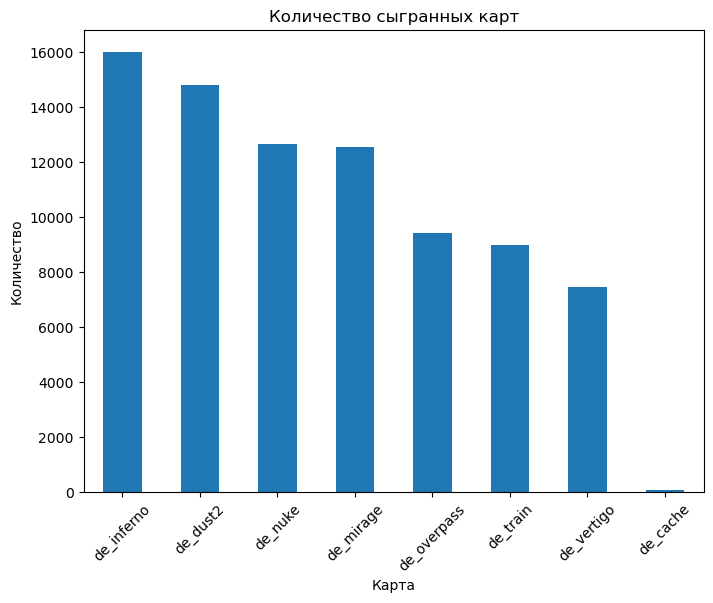

In [27]:
plt.figure(figsize=(8, 6))
df_train["map"].value_counts(normalize=False).plot.bar()
plt.title('Количество сыгранных карт')
plt.xlabel('Карта')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

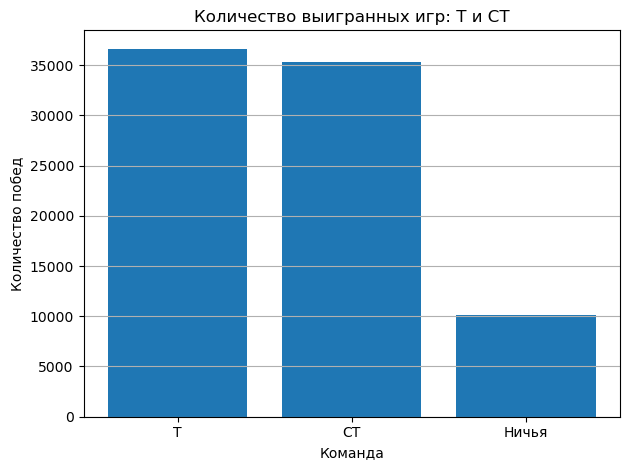

In [96]:
df_train['winner'] = df_train.apply(lambda row: 'CT' if row['ct_score'] > row['t_score'] 
                                    else ('T' if row['t_score'] > row['ct_score'] else 'Ничья'), axis=1)
results = df_train['winner'].value_counts()
plt.bar(results.index, results.values)
plt.title("Количество выигранных игр: T и CT")
plt.xlabel("Команда")
plt.ylabel("Количество побед")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

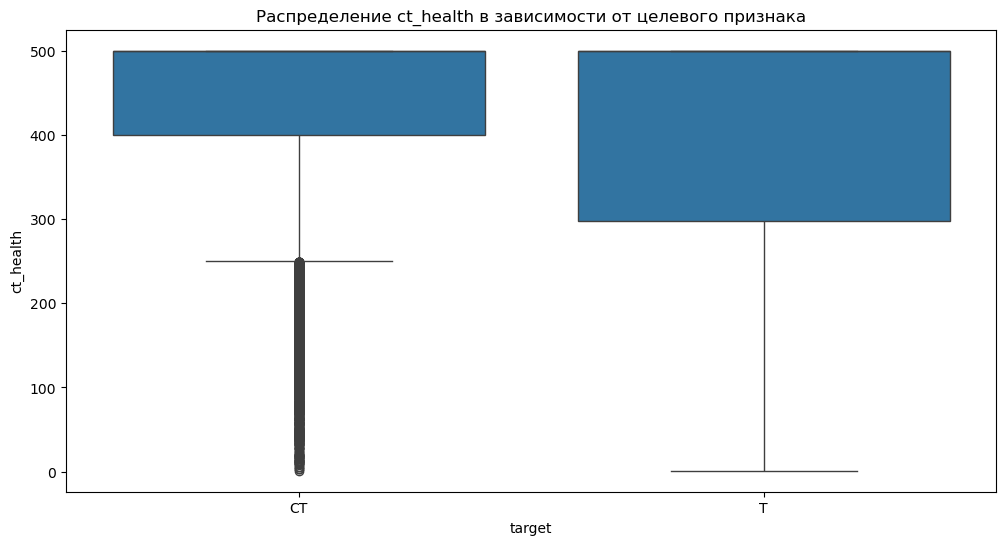

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='ct_health', data=df_train)
plt.title('Распределение ct_health в зависимости от целевого признака')
plt.show()

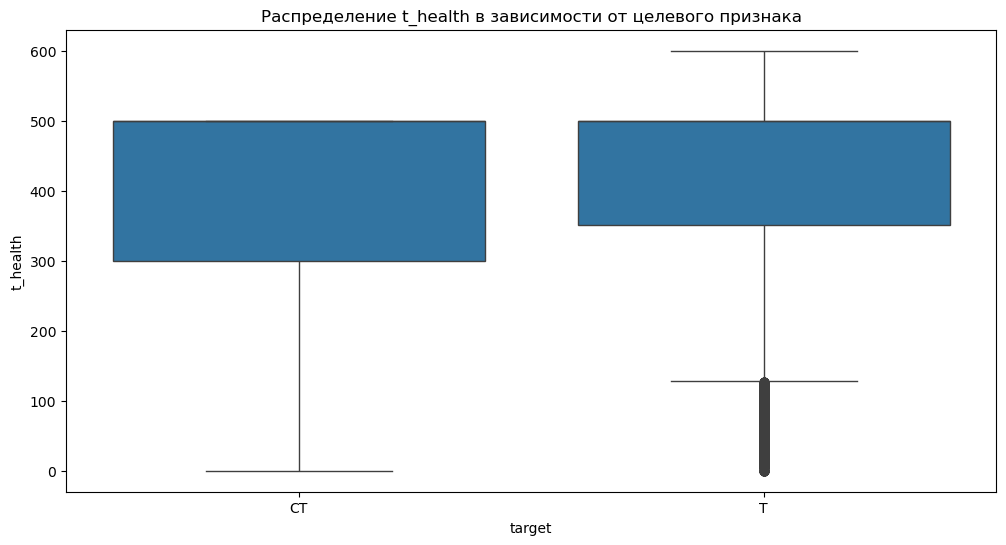

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='t_health', data=df_train)
plt.title('Распределение t_health в зависимости от целевого признака')
plt.show()

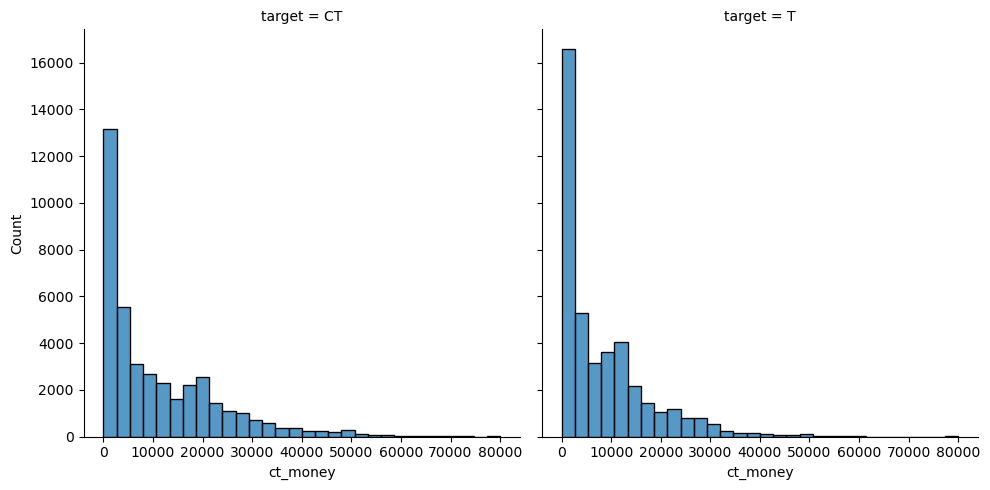

In [77]:
g = sns.FacetGrid(df_train, col='target', height=5)
g.map(sns.histplot, 'ct_money', bins=30)
plt.show()

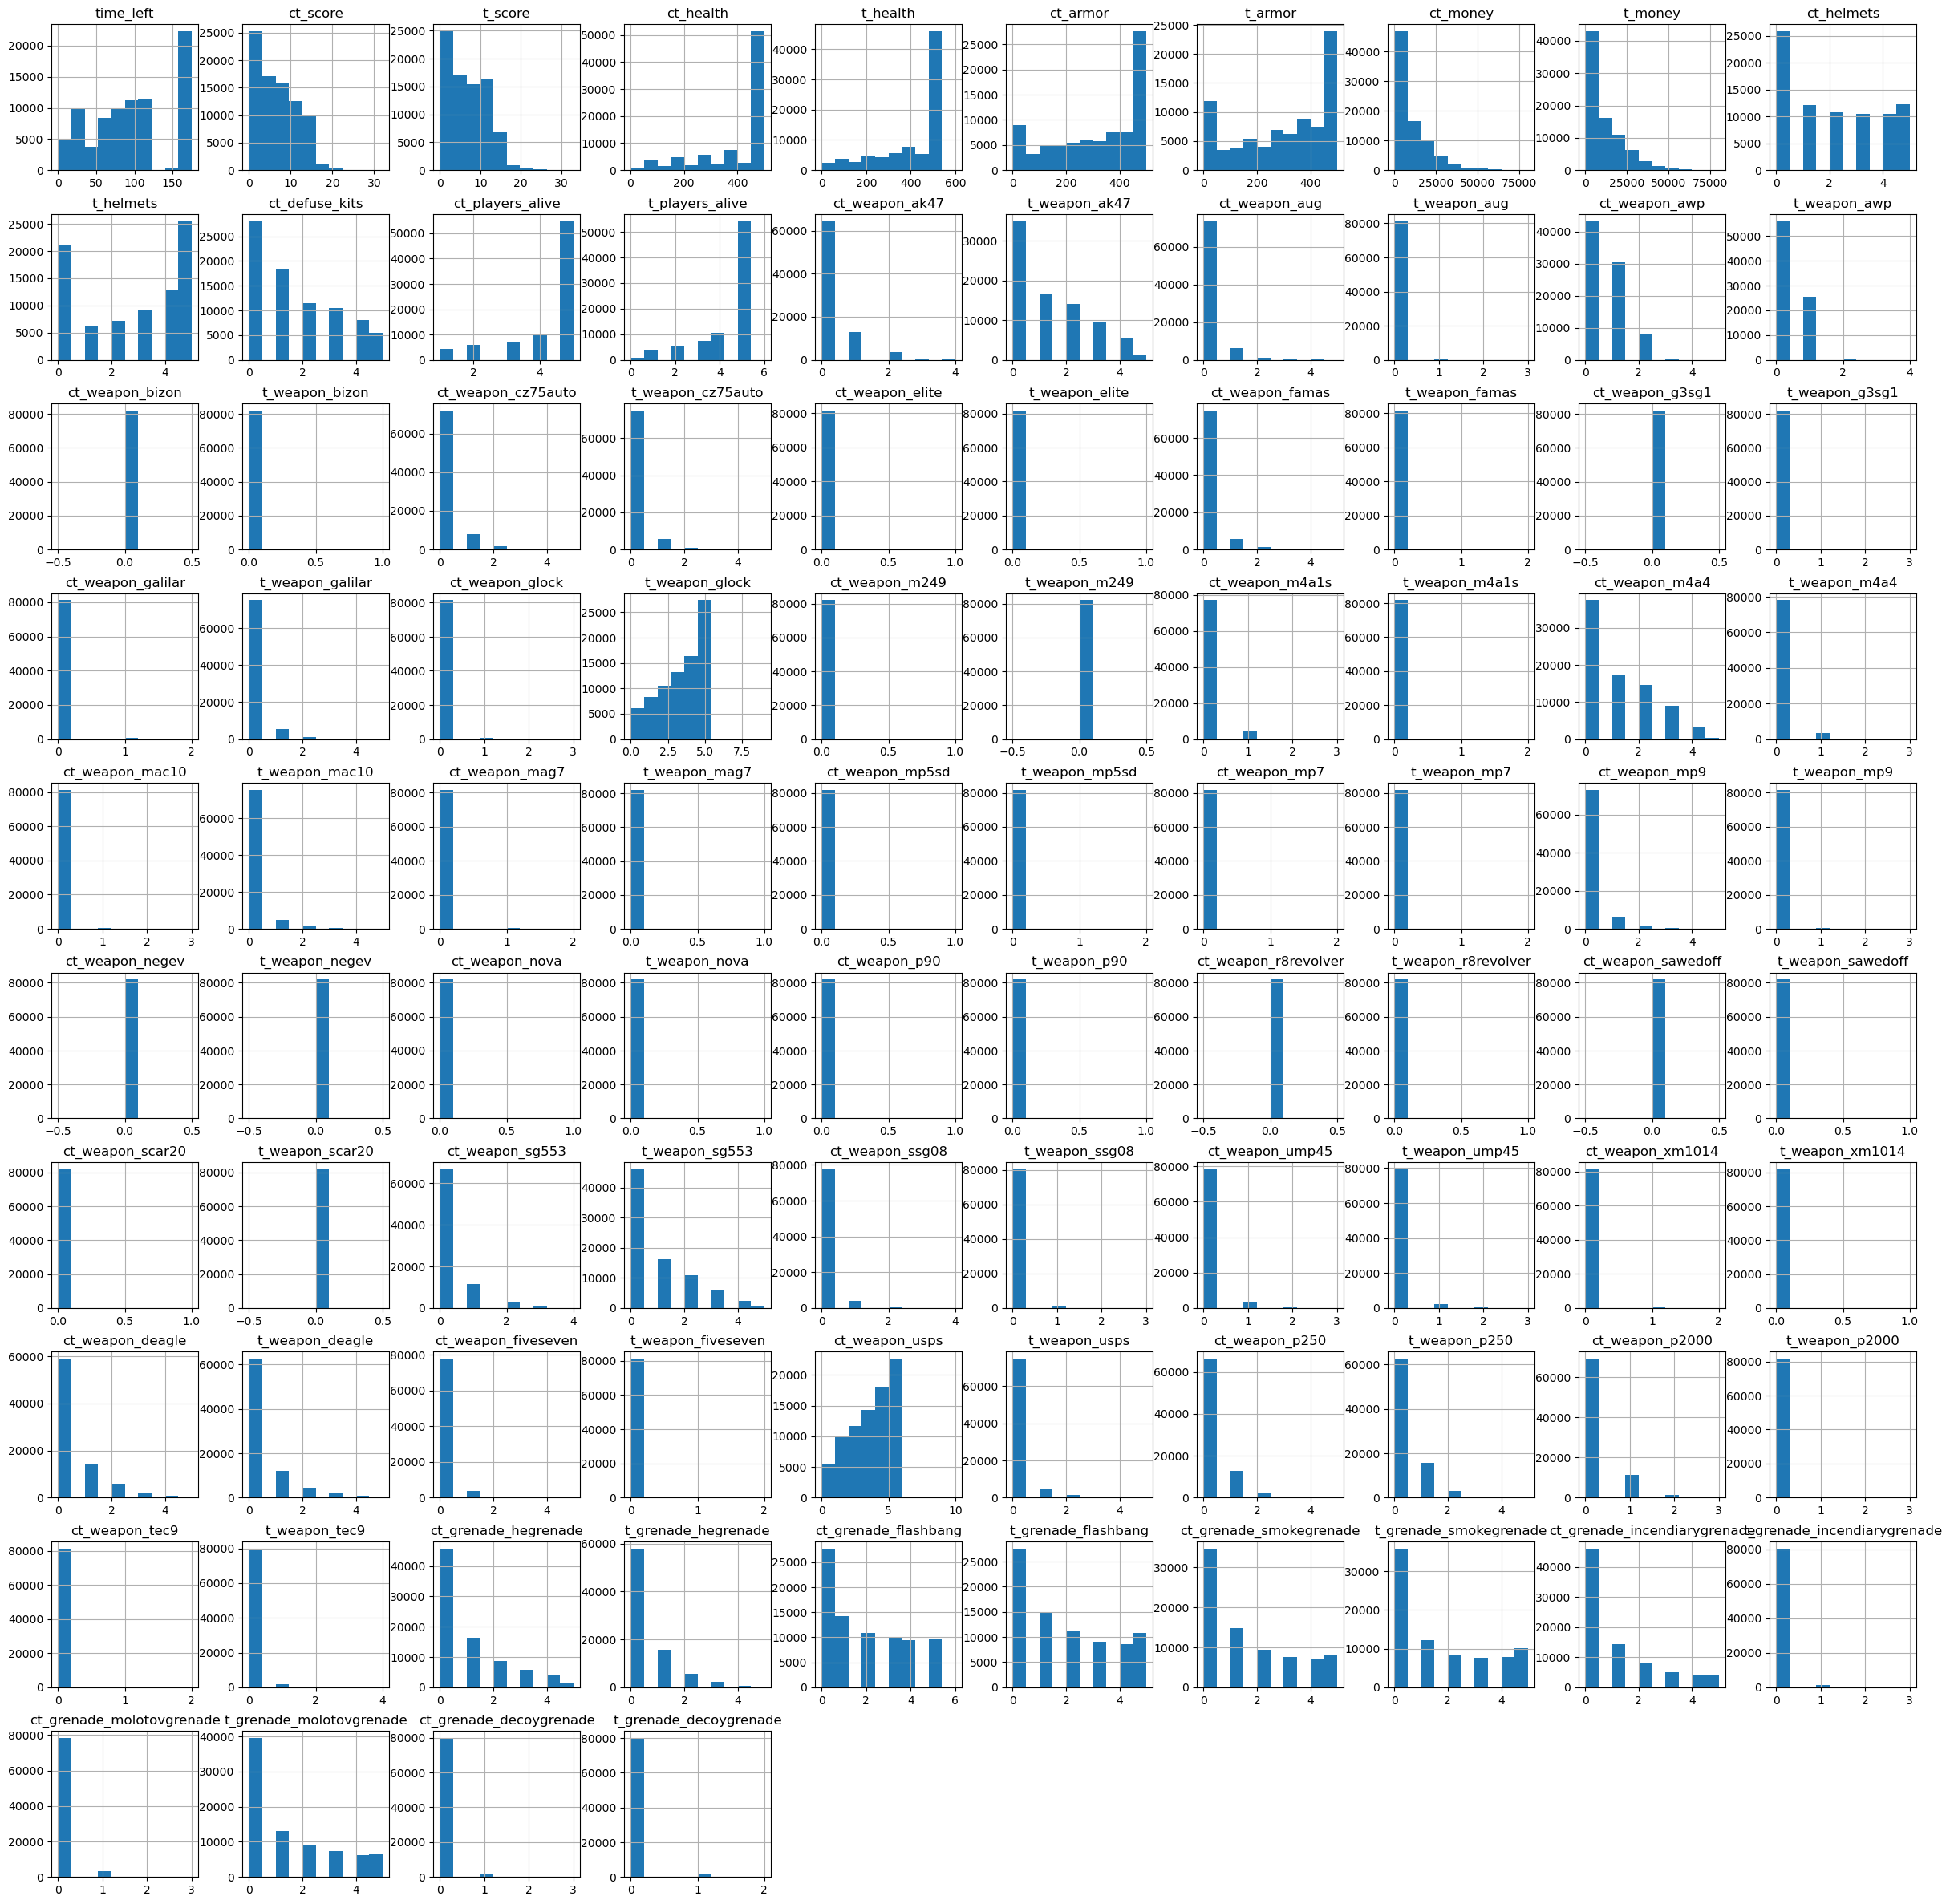

In [50]:
# гистаграммы всех признаков
df_train.hist(figsize=(30,30));

## Двумерный анализ признаков

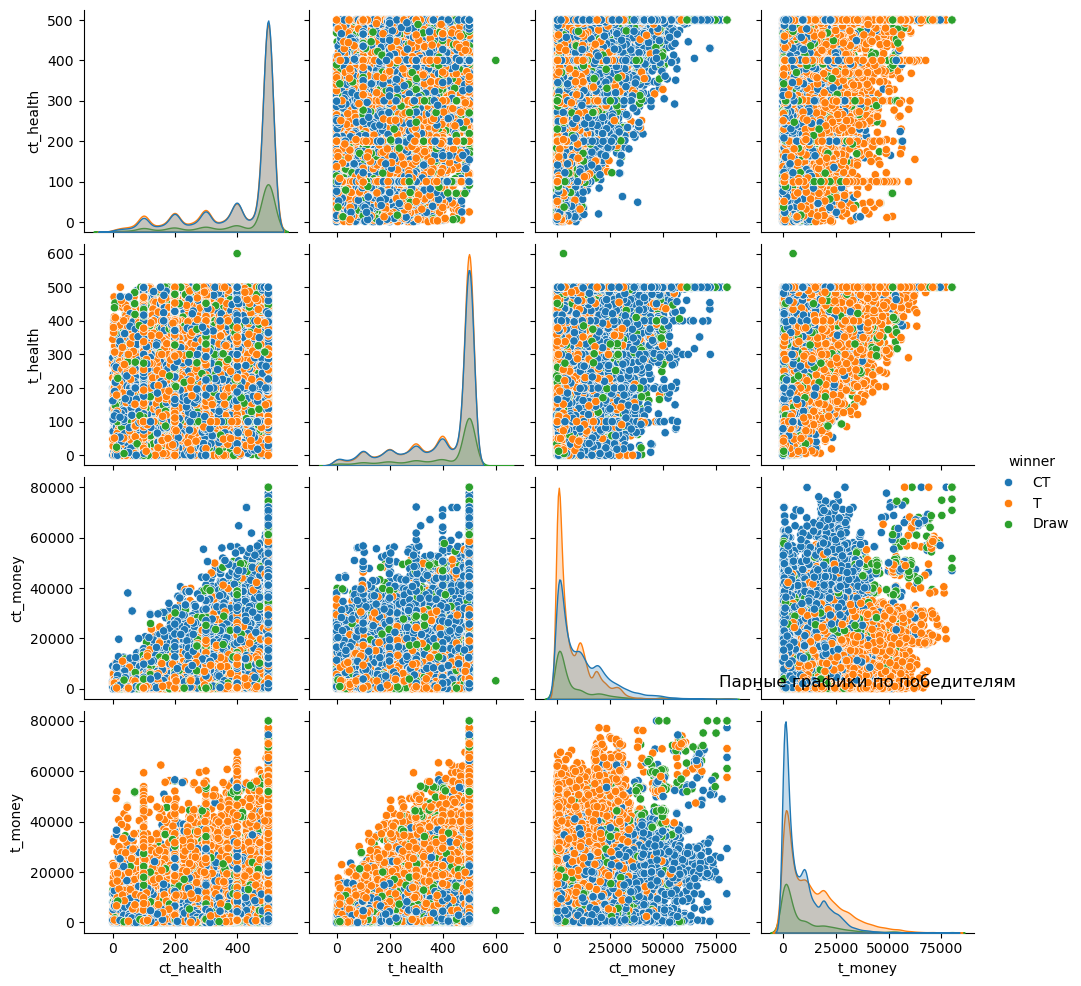

In [90]:
# Парные графики для визуализации между разными компонентами данных между победителями.
sns.pairplot(df_train, hue='winner', vars=['ct_health', 't_health', 'ct_money', 't_money'])
plt.title('Парные графики по победителям')
plt.show()

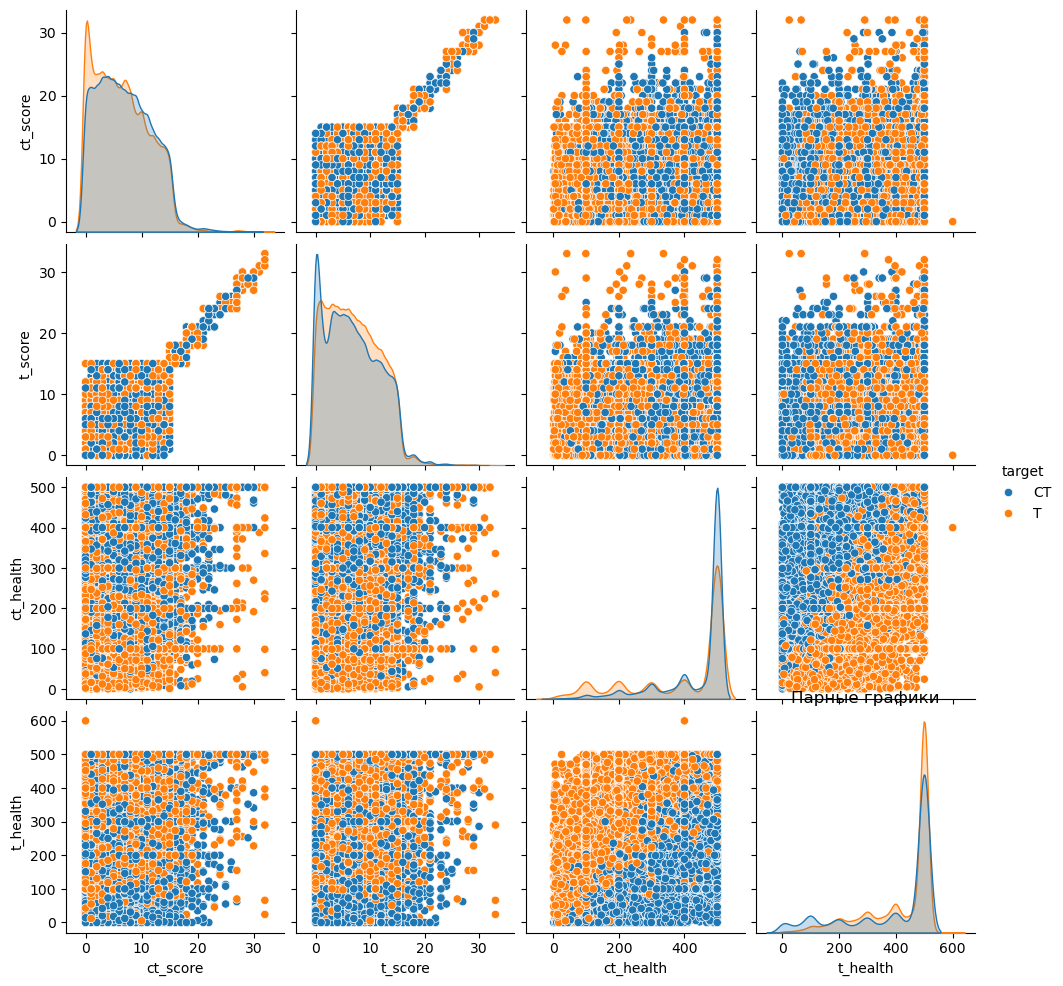

In [80]:
# Парные графики для визуализации многомерной зависимости между признаками и целевым признаком.
sns.pairplot(df_train, hue='target', vars=['ct_score', 't_score', 'ct_health', 't_health'])
plt.title('Парные графики')
plt.show()

In [34]:
df_encoded = pd.get_dummies(df_train, drop_first=True)
corr = df_encoded.corr()
corr

time_left  ct_score   t_score  bomb_planted  ct_health  \
time_left        1.000000 -0.000983 -0.004469     -0.484557   0.682053   
ct_score        -0.000983  1.000000  0.622507     -0.016532   0.017454   
t_score         -0.004469  0.622507  1.000000     -0.010213   0.002117   
bomb_planted    -0.484557 -0.016532 -0.010213      1.000000  -0.618243   
ct_health        0.682053  0.017454  0.002117     -0.618243   1.000000   
...                   ...       ...       ...           ...        ...   
map_de_train     0.012720  0.004182 -0.004018     -0.009194   0.005997   
map_de_vertigo  -0.007238  0.005128  0.001945     -0.001442  -0.016323   
target_T        -0.066713 -0.058479  0.026279      0.181186  -0.188054   
winner_Draw      0.026812 -0.123363 -0.127848      0.005509   0.006023   
winner_T        -0.013761 -0.289296  0.389013      0.008807  -0.023327   

                t_health  ct_armor   t_armor  ct_money   t_money  ...  \
time_left       0.678656 -0.094474 -0.197834  0.373317  0.341102  ...   
ct_score       -0.011422  0.098461  0.037867  0.244073  0.068986  ...   
t_score         0.000247  0.032343  0.081834  0.064036  0.255640  ...   
bomb_planted   -0.451422 -0.279202 -0.099474 -0.189601 -0.124633  ...   
ct_health       0.755651  0.389219  0.139956  0.305122  0.215782  ...   
...                  ...       ...       ...       ...       ...  ...   
map_de_train   -0.004765  0.007370 -0.025184  0.022430 -0.035316  ...   
map_de_vertigo -0.008361 -0.010331  0.009420 -0.022404  0.001136  ...   
target_T        0.094554 -0.333614  0.290569 -0.129321  0.099192  ...   
winner_Draw     0.011245 -0.053924 -0.064046 -0.051157 -0.055360  ...   
winner_T        0.006137 -0.070036  0.087610 -0.144953  0.212272  ...   

                map_de_dust2  map_de_inferno  map_de_mirage  map_de_nuke  \
time_left           0.001201       -0.033959       0.013201     0.024569   
ct_score            0.009789       -0.012203       0.005105    -0.002845   
t_score            -0.008183        0.012704       0.012031    -0.003355   
bomb_planted        0.014974        0.028598      -0.001812    -0.021323   
ct_health          -0.006804       -0.003955       0.005180     0.012420   
...                      ...             ...            ...          ...   
map_de_train       -0.164777       -0.172810      -0.149295    -0.149841   
map_de_vertigo     -0.148720       -0.155969      -0.134746    -0.135240   
target_T            0.025466        0.035067      -0.000905    -0.034516   
winner_Draw         0.000988       -0.009105       0.000463     0.008420   
winner_T           -0.026402        0.025425       0.017183    -0.014901   

                map_de_overpass  map_de_train  map_de_vertigo  target_T  \
time_left             -0.007219      0.012720       -0.007238 -0.066713   
ct_score              -0.008535      0.004182        0.005128 -0.058479   
t_score               -0.013023     -0.004018        0.001945  0.026279   
bomb_planted          -0.016948     -0.009194       -0.001442  0.181186   
ct_health              0.002325      0.005997       -0.016323 -0.188054   
...                         ...           ...             ...       ...   
map_de_train          -0.126370      1.000000       -0.111127 -0.033509   
map_de_vertigo        -0.114056     -0.111127        1.000000  0.010823   
target_T              -0.009700     -0.033509        0.010823  1.000000   
winner_Draw           -0.007760      0.011365       -0.003498 -0.002796   
winner_T               0.008580     -0.018186        0.009457  0.103948   

                winner_Draw  winner_T  
time_left          0.026812 -0.013761  
ct_score          -0.123363 -0.289296  
t_score           -0.127848  0.389013  
bomb_planted       0.005509  0.008807  
ct_health          0.006023 -0.023327  
...                     ...       ...  
map_de_train       0.011365 -0.018186  
map_de_vertigo    -0.003498  0.009457  
target_T          -0.002796  0.103948  
winner_Draw        1.000000 -0.33636

<Axes: >

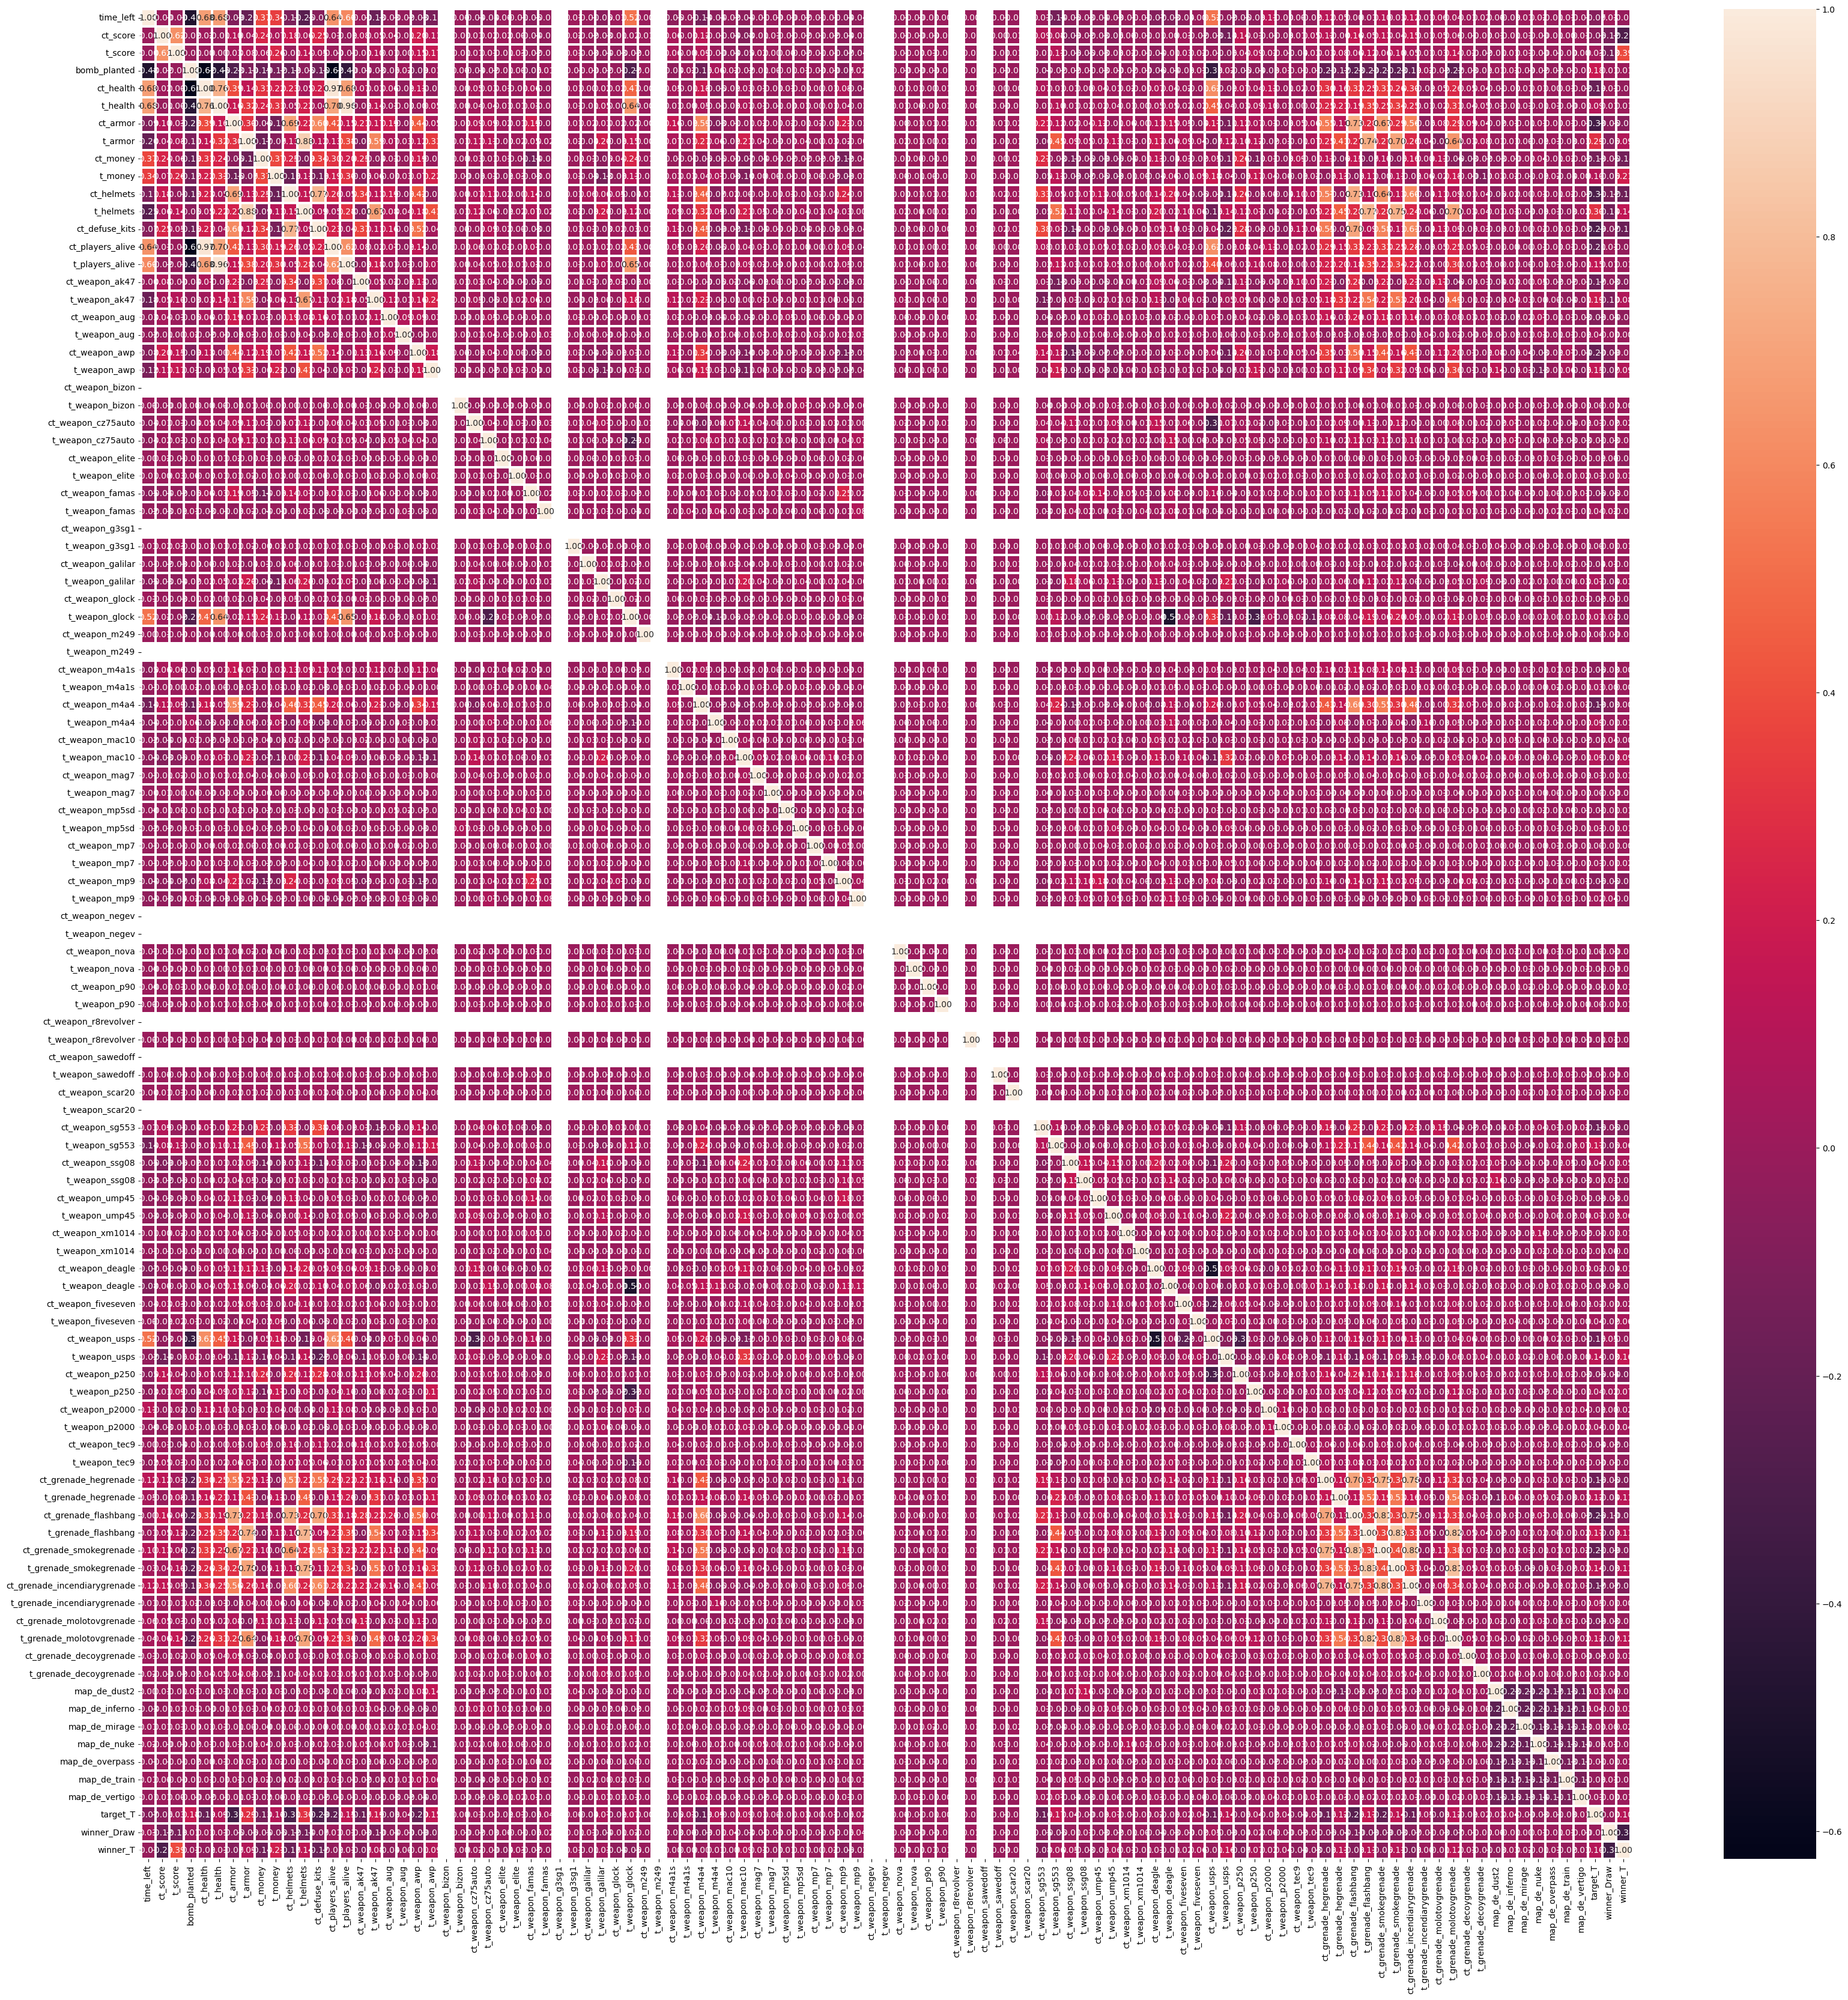

In [35]:
f,ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

## Modelling

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_train[[
    "time_left",
    "ct_score",
    "t_score",
    "bomb_planted",
    "ct_health",
    "t_health",
    "ct_armor",
    "t_armor",
    "ct_money",
    "t_money"
]]
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

y = df_train['target'] 

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## KNeighborsClassifier

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [120]:
%%time
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)
knn_accuracy

CPU times: total: 46.9 ms
Wall time: 37.6 ms


0.7458710511731018

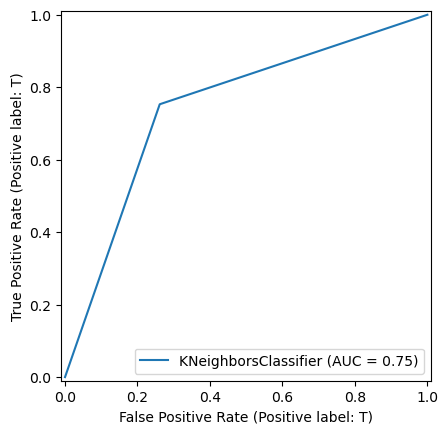

In [118]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

## Gaussian Naive Bayes

In [125]:
import time
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

start_time = time.time()
gnb.fit(X_train, y_train)
end_time = time.time()

In [127]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array(['CT', 'T', 'CT', 'T', 'T', 'T', 'CT', 'CT', 'CT', 'CT', 'T', 'T',
       'CT', 'CT', 'T', 'CT', 'CT', 'T', 'T', 'CT'], dtype='<U2')

array(['CT', 'T', 'CT', 'CT', 'T', 'T', 'CT', 'CT', 'CT', 'CT', 'CT', 'T',
       'T', 'T', 'T', 'T', 'CT', 'CT', 'T', 'T'], dtype=object)

In [129]:
from sklearn.metrics import accuracy_score
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

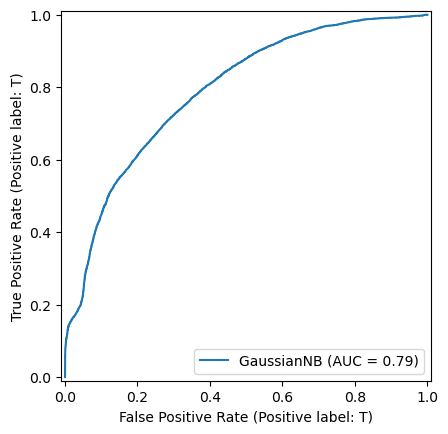

In [131]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

## Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

from sklearn.metrics import accuracy_score
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_accuracy

array(['CT', 'T', 'T', 'T', 'T', 'T', 'CT', 'CT', 'CT', 'CT', 'T', 'T',
       'T', 'T', 'T', 'T', 'CT', 'T', 'T', 'T'], dtype=object)

array(['CT', 'T', 'CT', 'CT', 'T', 'T', 'CT', 'CT', 'CT', 'CT', 'CT', 'T',
       'T', 'T', 'T', 'T', 'CT', 'CT', 'T', 'T'], dtype=object)

0.7593201551819694

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[ 9895,  3502],
       [ 3376, 10292]], dtype=int64)

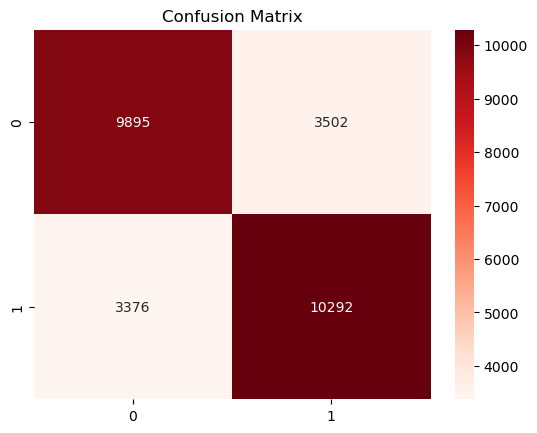

In [141]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

In [143]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_test, y_test_predict, average='micro'))
print(recall_score(y_test, y_test_predict, average='micro'))
print(f1_score(y_test, y_test_predict, average='micro'))

0.7458710511731018
0.7458710511731018
0.7458710511731018


In [147]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier"]

log_cols = ["Target"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy]
log

Target                Classifier  Accuracy
0    NaN      KNeighborsClassifier  0.745871
1    NaN      Gaussian Naive Bayes  0.697949
2    NaN  Random Forest Classifier  0.759320

In [149]:
from sklearn.metrics import classification_report
print(classification_report( y_test, y_test_predict))

              precision    recall  f1-score   support

          CT       0.75      0.74      0.74     13397
           T       0.75      0.75      0.75     13668

    accuracy                           0.75     27065
   macro avg       0.75      0.75      0.75     27065
weighted avg       0.75      0.75      0.75     27065



## Вывод